In [1]:
#gerekli kütüphane tanımlama işlemi
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2 as cv
import tensorflow as tf
from PIL import Image
import seaborn as sns
import os
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
# Resim matrislerinin tutulacağı dizi.
data = []
# Resim sınıflarının tutulacağı dizi.
labels = []
classes = 43
#getcwd dosya konumu döndürür
filepath = os.getcwd()
#veri toplama klasörü
filepath = 'D:\\DERS\\bahar dönemi\\archive'
os.listdir(filepath)

['archive',
 'archive.zip',
 'hatakontrol.py',
 'labels.csv',
 'Meta',
 'Meta.csv',
 'Test',
 'Test.csv',
 'Train',
 'Train.csv']

In [3]:
pd.read_csv('D:\\DERS\\bahar dönemi\\archive\\labels.csv')

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [4]:
for i in range(classes):
    path = os.path.join(filepath,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

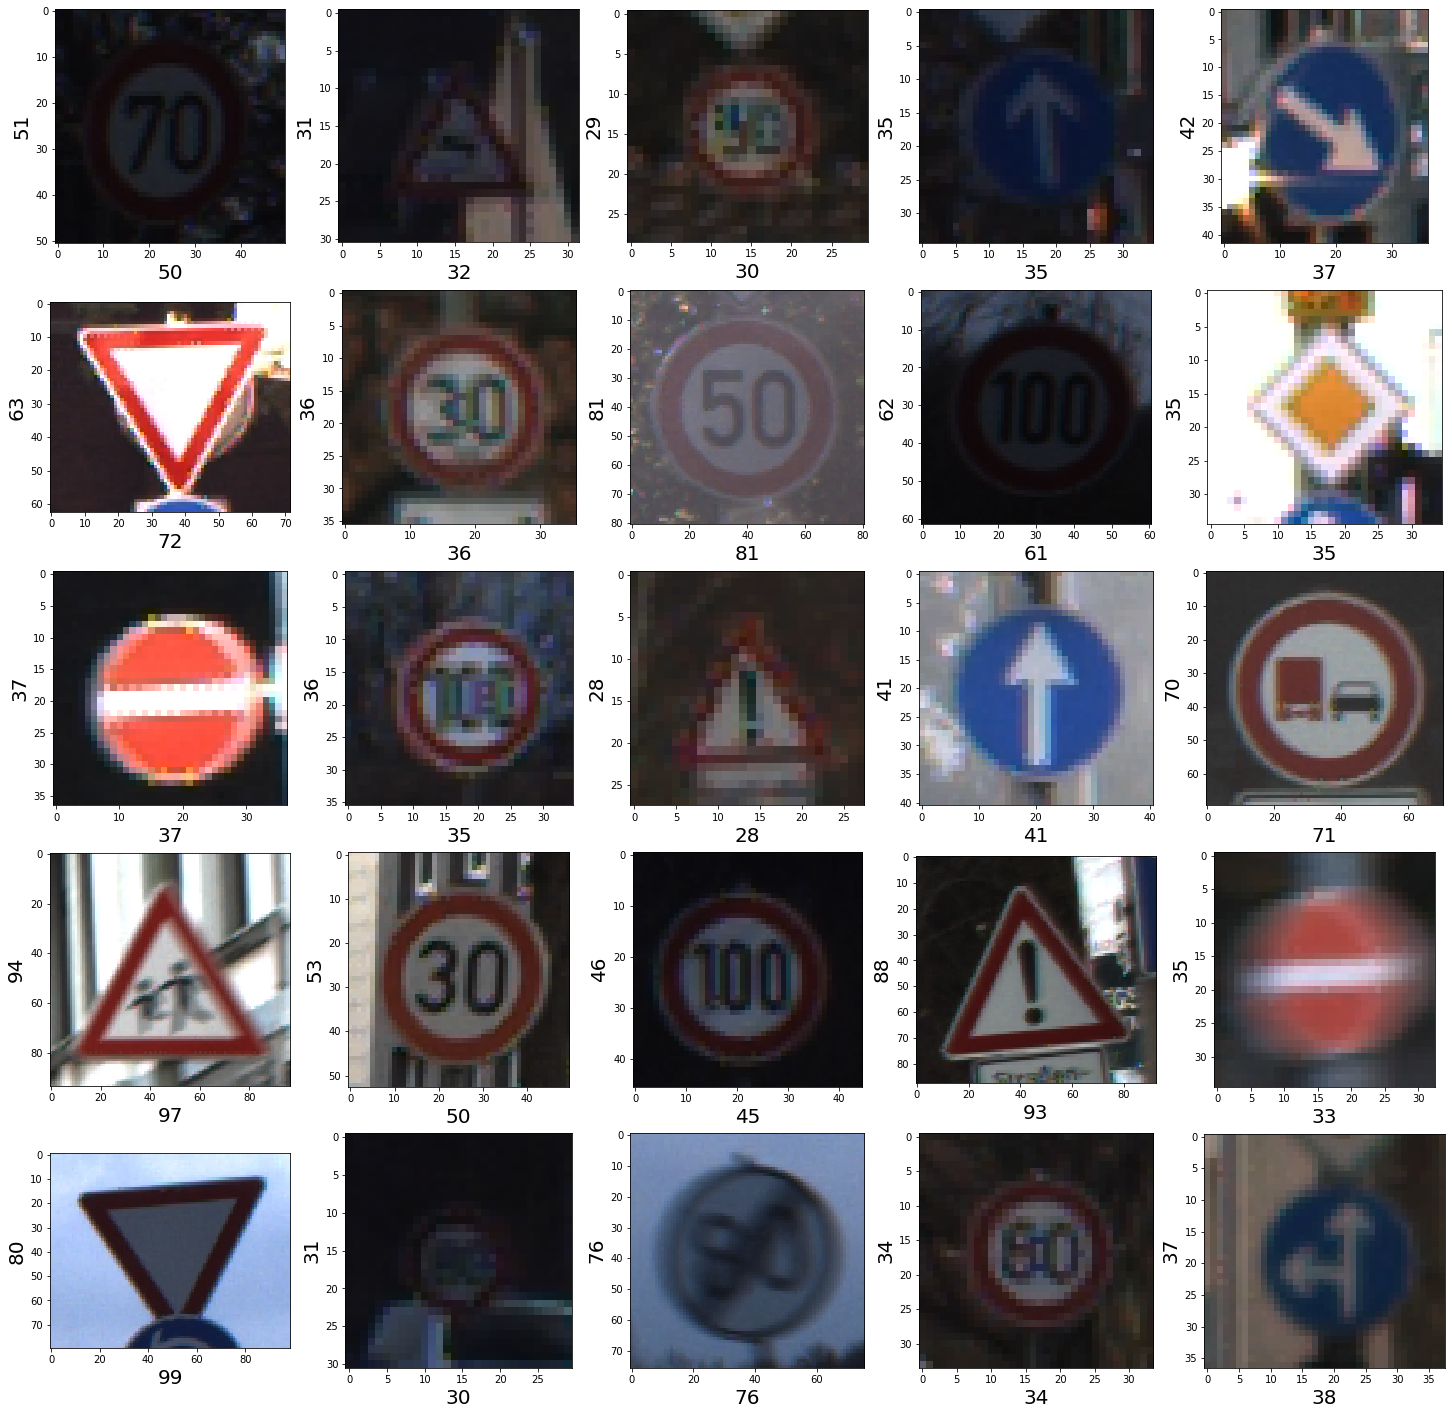

In [4]:
#görselleştirme işlemi 
#Test verisetinde rasgele 25 tane veriyi görselleştirme işlemi

images_path = os.listdir('D:\\DERS\\bahar dönemi\\archive\\Test')

plt.figure(figsize=(25,25))


for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = 'D:\\DERS\\bahar dönemi\\archive\\Test' +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [5]:
boyutx = []
boyuty = []

for i in range(0,43):
    labels = 'D:\\DERS\\bahar dönemi\\archive\\Train'+ '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        boyutx.append(img.shape[0])
        boyuty.append(img.shape[1])

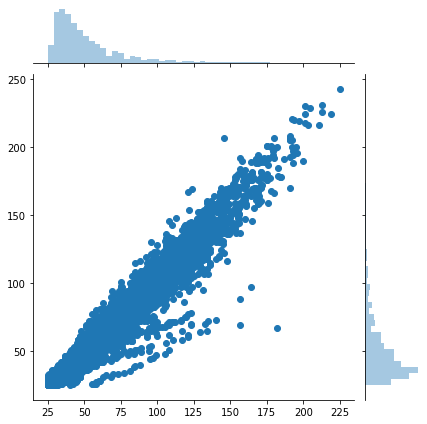

In [6]:
#ortak bir grafikle boyutları görmek için çizdirdik.
sns.jointplot(boyutx,boyuty)
plt.show()

In [7]:
np.mean(boyutx)

50.328929582493814

In [8]:
np.mean(boyuty)

50.83587951745773

In [9]:
#ortalamalar 50 civarında olduğundan (50*50) boyutunu kullanıyoruz.
image_shape=(50,50)

In [10]:
#görüntüleri import etme
from PIL import Image

images = []
label_id = []

for i in range(43):
    labels = 'D:\\DERS\\bahar dönemi\\archive\\Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [17]:
#Resimleri numpy dizisine dönüştürme
images = np.array(images)
# Her görüntünün piksel değeri 0 ile 255 arasında değişir.
# Her bir görüntünün 255'e bölünmesi, değerleri 0 ile 1 arasında ölçeklendirir. Normalleştirme işlemi.
images = images/255 

In [18]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [19]:
images.shape

(39209, 50, 50, 3)

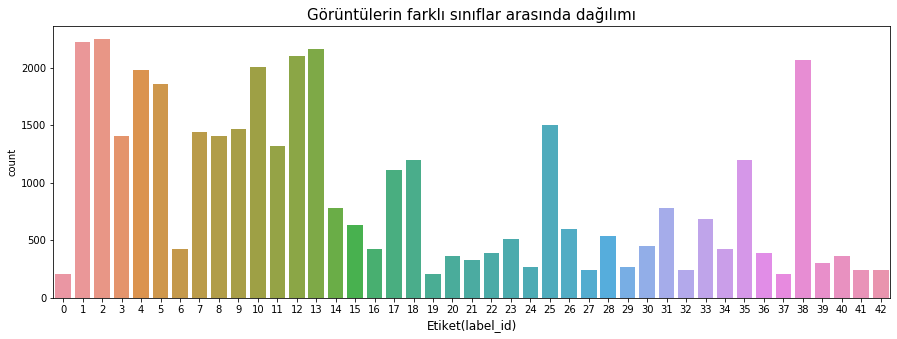

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(label_id)
plt.title('Görüntülerin farklı sınıflar arasında dağılımı', fontsize = 15)
plt.xlabel('Etiket(label_id)', fontsize=12)
plt.show()

In [21]:
#Ölçeklenmiş görüntüleri ve label_id ileride kullanmak üzere kaydettik.
np.save('Train veri seti', images)
np.save('Etiket', label_id)

In [22]:
images = np.load('Train veri seti.npy')
label_id = np.load('Etiket.npy')

In [23]:
# Verileri bölme
print(images.shape)
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42,shuffle=True)
X_test, X_val, Y_test, Y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42,shuffle=True)

(39209, 50, 50, 3)


In [24]:
#Hot encoding
y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)
print(images.shape)
print(y_train.shape,y_val.shape)
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(39209, 50, 50, 3)
(31367,) (7842,)
(31367, 50, 50, 3) (7842, 50, 50, 3) (31367,) (7842,)


In [39]:
y_train.shape

(31367,)

In [44]:
y_val.shape

(7842,)

In [46]:
model = Sequential()

#1.katman
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2.katman
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3.katman
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#yoğun katman
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Çıktı katmanı
model.add(Dense(43, activation = 'softmax'))


In [47]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [51]:
epochs = 20
history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_val, y_val))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 95s 3ms/sample - loss: 3.0675 - accuracy: 0.1733 - val_loss: 2.0015 - val_accuracy: 0.4300
Epoch 2/20
31367/31367 [==============================] - 91s 3ms/sample - loss: 1.7562 - accuracy: 0.4512 - val_loss: 1.0537 - val_accuracy: 0.7140
Epoch 3/20
31367/31367 [==============================] - 91s 3ms/sample - loss: 1.1245 - accuracy: 0.6325 - val_loss: 0.5730 - val_accuracy: 0.8660
Epoch 4/20
31367/31367 [==============================] - 91s 3ms/sample - loss: 0.7893 - accuracy: 0.7414 - val_loss: 0.3500 - val_accuracy: 0.9134
Epoch 5/20
31367/31367 [==============================] - 91s 3ms/sample - loss: 0.6150 - accuracy: 0.7972 - val_loss: 0.2500 - val_accuracy: 0.9424
Epoch 6/20
31367/31367 [==============================] - 92s 3ms/sample - loss: 0.5137 - accuracy: 0.8305 - val_loss: 0.1773 - val_accuracy: 0.9573
Epoch 7/20
31367/31367 [==============================] -

In [52]:
model.save("Model.h5")

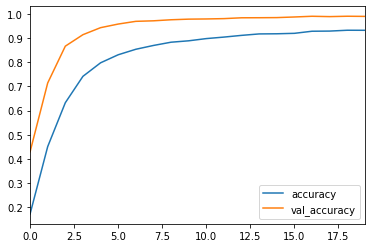

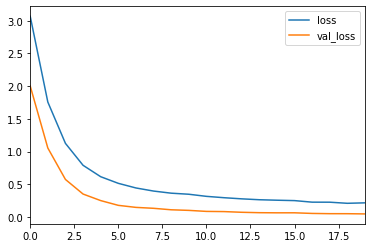

In [54]:
evaluation = pd.DataFrame(model.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [55]:
from tensorflow.keras.models import load_model
model = load_model('Model.h5')

In [56]:
test_path = 'D:\\DERS\\bahar dönemi\\archive\\archive\\Test'
test_img = sorted(os.listdir(test_path))

In [57]:
#görüntüleri ölçeklendirecek bir işlevi tanımlama
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        
        img = np.array(img)
        images.append(img)

    #Görüntüleri numpy dizisine dönüştürme
    images = np.array(images)
    #Her görüntünün piksel değeri 0 ile 255 arasında değişir
    #Her görüntünün 255'e bölünmesi, değerleri 0 ile 1 arasında ölçeklendirir. Bu aynı zamanda normalleştirmedir.
    images = images/255

    return images

In [58]:
test_images = scaling(test_img,test_path)

In [59]:
test = pd.read_csv('D:\\DERS\\bahar dönemi\\archive\\Test.csv')

y_test = test['ClassId'].values

y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [60]:
y_pred = model.predict_classes(test_images)

y_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.99      0.98      0.98       720
           2       0.94      0.99      0.96       750
           3       1.00      0.92      0.96       450
           4       0.99      0.98      0.99       660
           5       0.93      0.96      0.94       630
           6       0.99      0.95      0.97       150
           7       0.96      0.96      0.96       450
           8       0.97      0.96      0.96       450
           9       0.96      1.00      0.98       480
          10       1.00      0.98      0.99       660
          11       0.94      0.98      0.96       420
          12       0.96      0.93      0.94       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

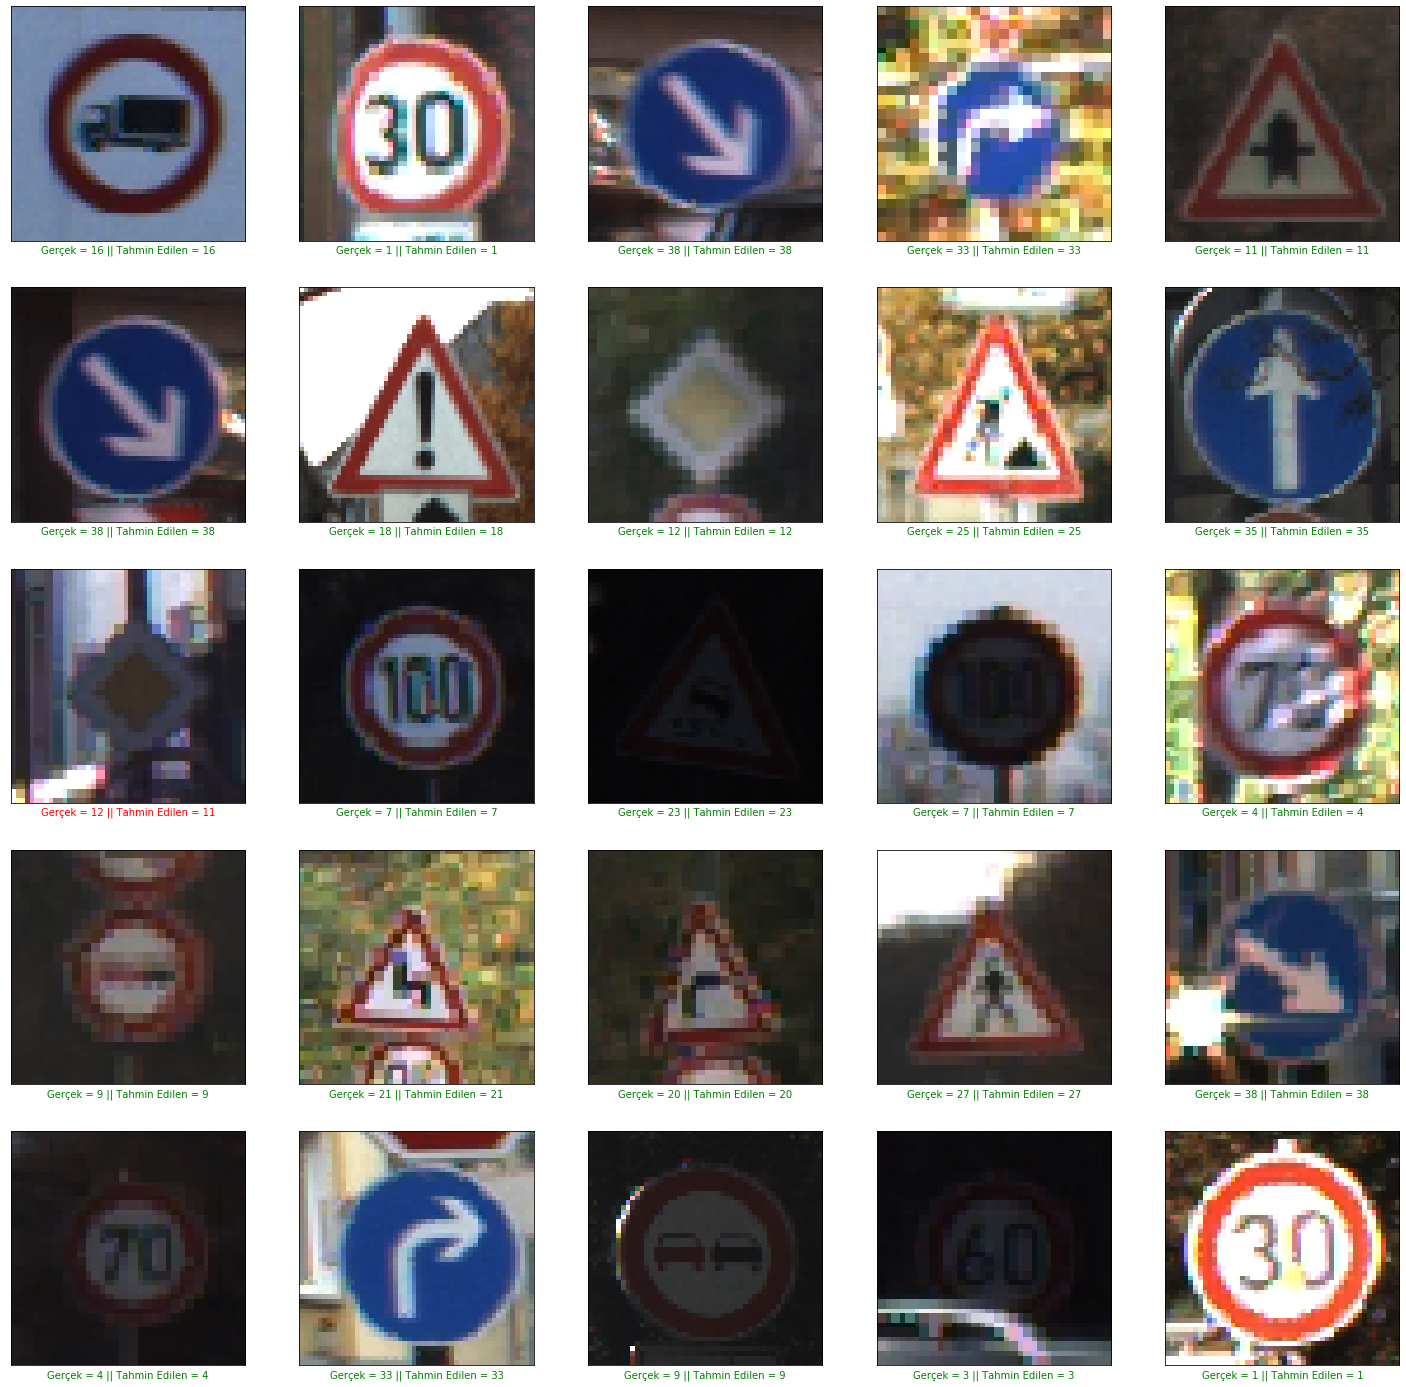

In [71]:
plt.figure(figsize=(25,25))
start_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    Tahmin = y_pred[start_index + i] 
    Gercek = y_test[start_index + i]
    col = 'g'
    if Tahmin != Gercek:
        col = 'r' 
    plt.xlabel('Gerçek = {} || Tahmin Edilen = {}'.format(Gercek,Tahmin), color=col)
    plt.imshow(test_images[start_index + i])
plt.show() 

In [62]:
model.save('ModelSınıflandırıcı.h5')